In [ ]:
# Atleta 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta de tu archivo
ruta = r"C:\Users\USUARIO\OneDrive\Desktop\Proyecto Biomecánica\202.xlsm"

# Leer el archivo completo
df = pd.read_excel(ruta, header=None)

# Función para extraer un bloque
def extraer_bloque(df, col_t, col_x, col_y, nombre):
    bloque = df[[col_t, col_x, col_y]].copy()
    bloque.columns = ["Tiempo", "X", "Y"]
    # Eliminar filas que no contienen números
    bloque = bloque[pd.to_numeric(bloque["Tiempo"], errors="coerce").notna()]
    bloque["Tiempo"] = bloque["Tiempo"].astype(float)
    bloque["X"] = bloque["X"].astype(float)
    bloque["Y"] = bloque["Y"].astype(float)
    print(f"\nPreview de {nombre}:")
    display(bloque.head())
    return bloque

# Extraer cada segmento
pie = extraer_bloque(df, 0, 1, 2, "Pie")
muslo = extraer_bloque(df, 4, 5, 6, "Muslo;")
pantorrilla = extraer_bloque(df, 8, 9, 10, "Pantorrilla")
cadera = extraer_bloque(df, 12, 13, 14, "Cadera")
sacro = extraer_bloque(df, 16, 17, 18, "Sacro")



Preview de Pie:


,Tiempo,X,Y
4,0.000000,-26.608862,-6.492325
5,33.366665,-26.608793,-6.492012
6,66.733330,-26.608675,-6.491188
7,100.099998,-26.608366,-6.489731
8,133.466660,-26.610937,-6.383568



Preview de Muslo;:


,Tiempo,X,Y
4,0.000000,-20.639421,23.970634
5,33.366665,-20.637947,23.968338
6,66.733330,-20.528442,23.865849
7,100.099998,-20.527403,23.865276
8,133.466660,-20.421009,23.869675



Preview de Pantorrilla:


,Tiempo,X,Y
4,0.000000,-18.707924,8.335175
5,33.366665,-18.707474,8.334221
6,66.733330,-18.596895,8.231339
7,100.099998,-18.489552,8.235306
8,133.466660,-18.385292,8.345360



Preview de Cadera:


,Tiempo,X,Y
4,0.000000,-30.114178,32.584652
5,33.366665,-30.112894,32.583447
6,66.733330,-30.002338,32.479866
7,100.099998,-29.892475,32.377174
8,133.466660,-29.891094,32.378712



Preview de Sacro:


,Tiempo,X,Y
4,0.000000,-40.910931,35.017059
5,33.366665,-40.909626,35.016575
6,66.733330,-40.798901,34.913815
7,100.099998,-40.692062,34.917095
8,133.466660,-40.691235,34.916458


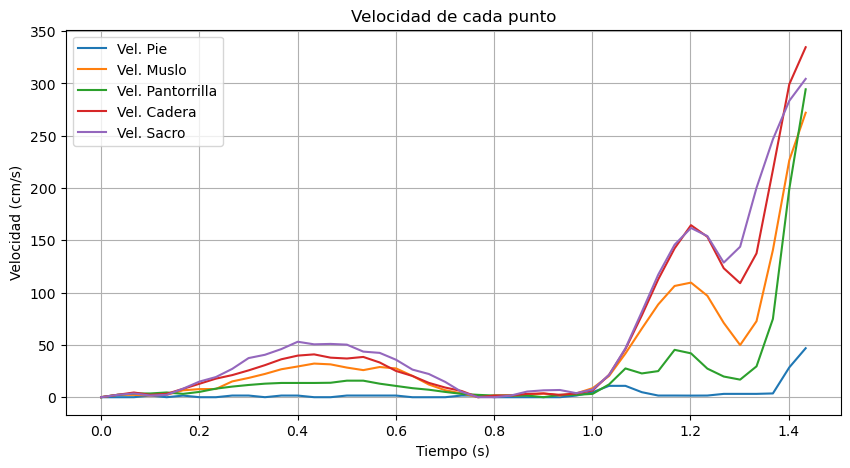

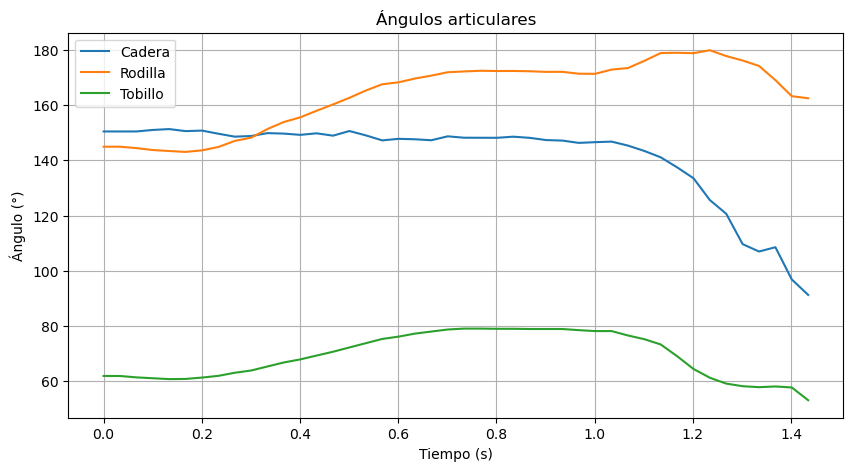


==== Pie ====
Velocidad total MAX: 46.856 cm/s
Velocidad total MIN: 0.006 cm/s
Velocidad en X MAX: 45.426 cm/s
Velocidad en X MIN: -10.215 cm/s
Velocidad en Y MAX: 1.613 cm/s
Velocidad en Y MIN: -11.487 cm/s

==== Muslo ====
Velocidad total MAX: 271.947 cm/s
Velocidad total MIN: 0.051 cm/s
Velocidad en X MAX: 265.258 cm/s
Velocidad en X MIN: -8.094 cm/s
Velocidad en Y MAX: 59.946 cm/s
Velocidad en Y MIN: -14.847 cm/s

==== Pantorrilla ====
Velocidad total MAX: 294.364 cm/s
Velocidad total MIN: 0.017 cm/s
Velocidad en X MAX: 247.685 cm/s
Velocidad en X MIN: -14.672 cm/s
Velocidad en Y MAX: 159.068 cm/s
Velocidad en Y MIN: -27.421 cm/s

==== Cadera ====
Velocidad total MAX: 334.585 cm/s
Velocidad total MIN: 0.053 cm/s
Velocidad en X MAX: 334.419 cm/s
Velocidad en X MIN: -1.529 cm/s
Velocidad en Y MAX: 40.157 cm/s
Velocidad en Y MIN: -3.261 cm/s

==== Sacro ====
Velocidad total MAX: 304.337 cm/s
Velocidad total MIN: 0.011 cm/s
Velocidad en X MAX: 301.248 cm/s
Velocidad en X MIN: -3.030 c

In [52]:
def calcular_velocidad(segmento):
    x = segmento["X"].values
    y = segmento["Y"].values
    t = segmento["Tiempo"].values / 1000  # ms → s
    
    vx = np.gradient(x, t)
    vy = np.gradient(y, t)
    v = np.sqrt(vx**2 + vy**2)
    return vx, vy, v

vel_pie = calcular_velocidad(pie)
vel_muslo = calcular_velocidad(muslo)
vel_pant = calcular_velocidad(pantorrilla)
vel_cad = calcular_velocidad(cadera)
vel_sacro = calcular_velocidad(sacro)

def angulo_3p(a, b, c):
    ba = a - b
    bc = c - b
    
    cos_ang = np.sum(ba * bc, axis=1) / (np.linalg.norm(ba, axis=1) * np.linalg.norm(bc, axis=1))
    ang = np.arccos(np.clip(cos_ang, -1, 1))
    return np.degrees(ang)

pie_xy = pie[["X","Y"]].values
pant_xy = pantorrilla[["X","Y"]].values
muslo_xy = muslo[["X","Y"]].values
cadera_xy = cadera[["X","Y"]].values
sacro_xy = sacro[["X","Y"]].values

# Rodilla = Muslo - Rodilla(Pant) - Pie
angulo_rodilla = angulo_3p(muslo_xy, pant_xy, pie_xy)

# Cadera = Sacro - Cadera - Muslo
angulo_cadera = angulo_3p(sacro_xy, cadera_xy, muslo_xy)

# Tobillo = Pantorrilla - Pie - eje horizontal (vector auxiliar)
angulo_tobillo = angulo_3p(pant_xy, pie_xy, pie_xy + np.array([1,0]))

# =========================================
# Gráficas
# =========================================
tiempo_seg = pie["Tiempo"].values / 1000

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, vel_pie[2], label="Vel. Pie")
plt.plot(tiempo_seg, vel_muslo[2], label="Vel. Muslo")
plt.plot(tiempo_seg, vel_pant[2], label="Vel. Pantorrilla")
plt.plot(tiempo_seg, vel_cad[2], label="Vel. Cadera")
plt.plot(tiempo_seg, vel_sacro[2], label="Vel. Sacro")
plt.legend()
plt.title("Velocidad de cada punto")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (cm/s)")
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, angulo_cadera, label="Cadera")
plt.plot(tiempo_seg, angulo_rodilla, label="Rodilla")
plt.plot(tiempo_seg, angulo_tobillo, label="Tobillo")
plt.legend()
plt.title("Ángulos articulares")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")
plt.grid()
plt.show()

# =========================================
# Velocidades máximas y mínimas
# =========================================
def resumen_vel(nombre, vel):
    vx, vy, v = vel
    print(f"\n==== {nombre} ====")
    print(f"Velocidad total MAX: {np.max(v):.3f} cm/s")
    print(f"Velocidad total MIN: {np.min(v):.3f} cm/s")
    print(f"Velocidad en X MAX: {np.max(vx):.3f} cm/s")
    print(f"Velocidad en X MIN: {np.min(vx):.3f} cm/s")
    print(f"Velocidad en Y MAX: {np.max(vy):.3f} cm/s")
    print(f"Velocidad en Y MIN: {np.min(vy):.3f} cm/s")

resumen_vel("Pie", vel_pie)
resumen_vel("Muslo", vel_muslo)
resumen_vel("Pantorrilla", vel_pant)
resumen_vel("Cadera", vel_cad)
resumen_vel("Sacro", vel_sacro)

# =========================================
# Ángulos máximos y mínimos
# =========================================
def resumen_ang(nombre, ang):
    print(f"\n==== Ángulo de {nombre} ====")
    print(f"Ángulo MAX: {np.max(ang):.3f} grados")
    print(f"Ángulo MIN: {np.min(ang):.3f} grados")

resumen_ang("Cadera", angulo_cadera)
resumen_ang("Rodilla", angulo_rodilla)
resumen_ang("Tobillo", angulo_tobillo)




